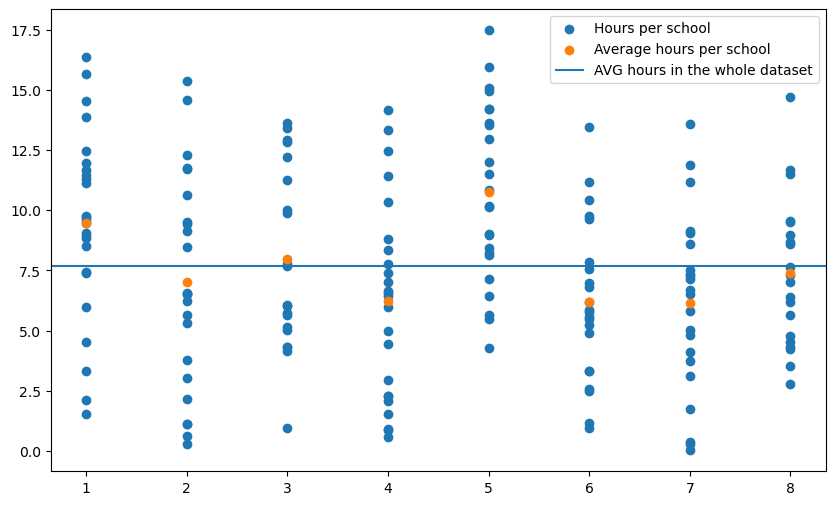

In [62]:
'''
Import modules
'''

#used to import rdata
from scipy.stats import gamma
import pandas as pd
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from scipy.stats import norm
import seaborn as sns
from scipy.stats import invgamma


'''
Define Data
'''

data = np.array([
    [1, 2.11], [1, 9.75], [1, 13.88], [1, 11.3], [1, 8.93], [1, 15.66], [1, 16.38], [1, 4.54], [1, 8.86], [1, 11.94], [1, 12.47], [1, 11.11], [1, 11.65], [1, 14.53], [1, 9.61], [1, 7.38], [1, 3.34], [1, 9.06], [1, 9.45], [1, 5.98], [1, 7.44], [1, 8.5], [1, 1.55], [1, 11.45], [1, 9.73], [2, 0.29], [2, 1.13], [2, 6.52], [2, 11.72], [2, 6.54], [2, 5.63], [2, 14.59], [2, 11.74], [2, 9.12], [2, 9.43], [2, 10.64], [2, 12.28], [2, 9.5], [2, 0.63], [2, 15.35], [2, 5.31], [2, 8.49], [2, 3.04], [2, 3.77], [2, 6.22], [2, 2.14], [2, 6.58], [2, 1.11], [3, 4.33], [3, 7.77], [3, 4.15], [3, 5.64], [3, 7.69], [3, 5.04], [3, 10.01], [3, 13.43], [3, 13.63], [3, 9.9], [3, 5.72], [3, 5.16], [3, 4.33], [3, 12.9], [3, 11.27], [3, 6.05], [3, 0.95], [3, 6.02], [3, 12.22], [3, 12.85], [4, 12.46], [4, 6.42], [4, 5.96], [4, 0.92], [4, 11.43], [4, 2.27], [4, 1.54], [4, 6.55], [4, 2.3], [4, 0.57], [4, 7.4], [4, 6.63], [4, 7.02], [4, 2.95], [4, 4.44], [4, 7.78], [4, 8.36], [4, 13.32], [4, 8.81], [4, 2.06], [4, 14.17], [4, 0.88], [4, 10.36], [4, 4.97], [5, 12.97], [5, 13.6], [5, 13.54], [5, 5.49], [5, 11.52], [5, 8.23], [5, 8.98], [5, 6.42], [5, 12.01], [5, 15.08], [5, 7.16], [5, 10.84], [5, 8.15], [5, 4.27], [5, 14.21], [5, 15.93], [5, 8.99], [5, 10.12], [5, 5.65], [5, 14.94], [5, 14.2], [5, 8.43], [5, 10.18], [5, 17.47], [6, 2.5], [6, 7.56], [6, 5.79], [6, 4.92], [6, 3.32], [6, 9.65], [6, 2.58], [6, 3.31], [6, 5.47], [6, 6.98], [6, 9.74], [6, 0.97], [6, 6.2], [6, 11.16], [6, 13.45], [6, 7.84], [6, 10.43], [6, 5.85], [6, 5.56], [6, 6.82], [6, 5.23], [6, 1.18], [7, 7.5], [7, 11.15], [7, 5.82], [7, 0.39], [7, 4.11], [7, 4.82], [7, 13.56], [7, 3.11], [7, 6.69], [7, 7.33], [7, 11.87], [7, 9.14], [7, 0.03], [7, 1.76], [7, 5.03], [7, 3.72], [7, 7.28], [7, 7.15], [7, 9.07], [7, 8.59], [7, 6.53], [7, 0.27], [8, 6.41], [8, 3.52], [8, 7.65], [8, 9.56], [8, 9.49], [8, 4.54], [8, 14.72], [8, 5.63], [8, 4.24], [8, 8.96], [8, 8.59], [8, 8.69], [8, 6.18], [8, 4.79], [8, 11.67], [8, 2.8], [8, 7.03], [8, 4.32], [8, 11.51], [8, 7.32]
])

'''
Visual description of the data
'''

#compute average hours within each school 
schools = np.unique(data[:,0])
avg_h = np.zeros(len(schools))
for i,s in enumerate(schools):
    check = data[:,0] == s
    avg_h[i] = np.mean(data[check][:,1])
# compute average of all

mean_total = np.mean(data[:,1])

#plot the data

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], label = 'Hours per school')
plt.scatter(schools, avg_h,label = 'Average hours per school')
plt.axhline(y = mean_total, label = 'AVG hours in the whole dataset')
plt.legend()
plt.show()

The school dataset gives weekly hours spent on studying or homework for students sampled from eight different schools. Obtain posterior distributions for the true means for the eight different schools using a hierarchical normal model with the following prior parameters:
$\mu_0 = 7$, $\gamma_0^2 = 5$, $\eta_0 = 2$, $\tau_0^2 = 10$, $\nu_0 = 2$, $\sigma_0^2 = 15$.

Build the Gibbs sampling algorithm to approximate the posterior distribution of the parameters of interest

In [64]:
np.random.seed(123)
#------------------------------------------
# initialize prior parameters
# Prior parameters
mu0 = 7
g20 = 5
t20 = 10
eta0 = 2
s20 = 15
nu0 = 2

# Assuming Y is a numpy array containing school IDs and math scores
Y = data

#define m which is the number of groups
# Number of schools
m = len(np.unique(Y[:, 0]))
#------------------------------------------

#------------------------------------------
#DEFINE STARTING VALUES

#build vector to store empircal values
ybar = np.zeros(m)
sv = np.zeros(m)
n = np.zeros(m)

# fill the vector
for j in range(m):
  #determine the empirical mean
  Y_j = Y[Y[:,0] == j+1,1]
  ybar[j] = np.mean(Y_j)
  #determine the within sample varaibility
  sv[j] = np.var(Y_j)
  #determine the number of students in each school
  n[j] = len(Y_j)

# Initial estimates
theta = ybar.copy()
sigma2 = np.mean(sv)
mu = np.mean(theta)
tau2 = np.var(theta)

#------------------------------------------
#SETUP MCMC
# define number of iterations
burnin = int(1e3)
S = int(1e4)

# define theta matrix
THETA = np.zeros((S-burnin, m))
SMT = np.zeros((S-burnin, 3))
#------------------------------------------

# MCMC ALGORITHM
for s in tqdm(range(S)):

  # samole new thetas

  for j in range(m):

    # define variance of theta

    vtheta = 1 / (n[j] / sigma2 + 1 / tau2)
    # define exp theta
    etheta = vtheta * (ybar[j] * n[j] / sigma2 + mu / tau2)

    theta[j] = norm.rvs(loc=etheta, scale=np.sqrt(vtheta))



  # sample new value of sigma2
  nun = nu0+np.sum(n)
  ss = nu0*s20

  #POOL VARIANCE
  for j in range(m):


    ss += np.sum((Y[Y[:, 0] == j + 1, 1] - theta[j]) ** 2)

    #sigma2 = 1/gamma.rvs(a = (nun/2), scale = (1/(ss/2)))
    sigma2 = 1 / gamma.rvs(a=nun / 2, scale=2 / ss)



  # sample new value for mu
  vmu = 1 / (m / tau2 + 1 / g20)

  emu = vmu * (m * np.mean(theta) / tau2 + mu0 / g20)

  mu = norm.rvs(loc=emu, scale=np.sqrt(vmu))



  # sample a new value for tau2
  etam = eta0 +m
  ss = eta0*t20 + np.sum((theta-mu)**2)
  #tau2 = 1/gamma.rvs(a = (etam/2), scale = (1/(ss/2)))
  tau2 = 1 / gamma.rvs(a=etam / 2, scale=2 / ss)

  #store results
  if s >= burnin:
    THETA[s-burnin,:] = theta
    SMT[s-burnin,0] = sigma2
    SMT[s-burnin,1] = mu
    SMT[s-burnin,2] = tau2

# define iterations vector
S_vector = [i for i in range(S-burnin) ]




100%|██████████| 10000/10000 [00:13<00:00, 748.99it/s]


Now let's evaluate the stationarity of the markov chain using stationarity plots of the MCMC samples.  These plots represent the boxplot of sequential groups of the markov chain (i.e. take from s = 0 to s = 500, take s = 500 to s = 1000 and so on). This is made for $μ$, $\sigma^2$, and $\tau^2$. As we can see below, the stationarity is achieved:

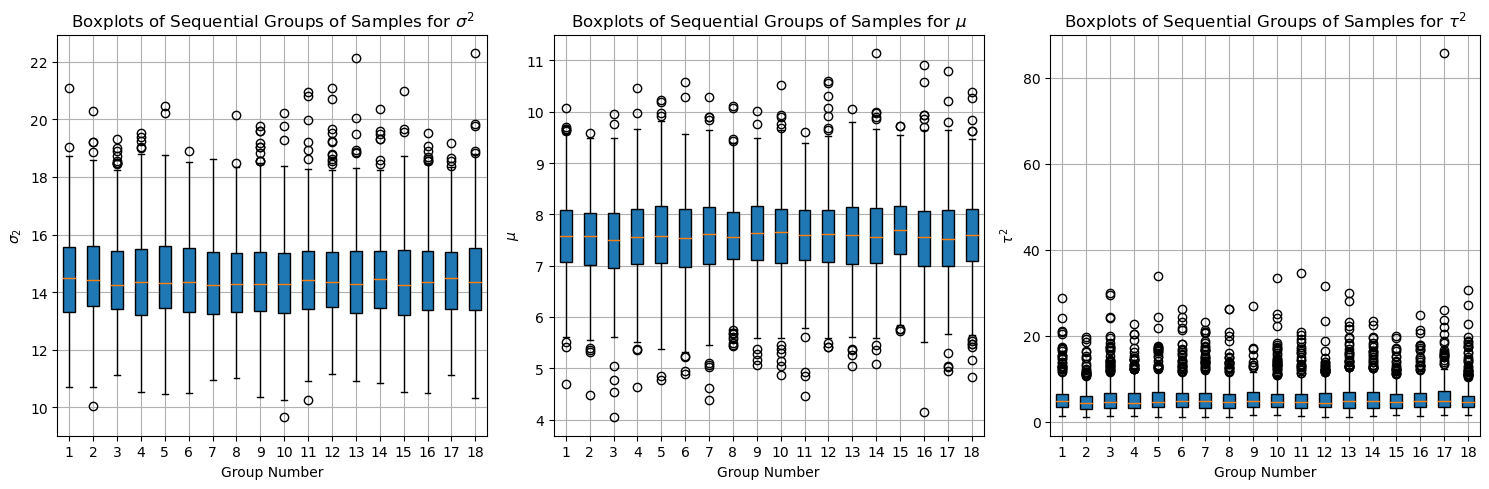

In [65]:
group_size = 500

# Divide the data into sequential groups
data = SMT[:,0]
groups = [data[i:i+group_size] for i in range(0, len(data), group_size)]

# Plot the boxplots for each group on the same axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].boxplot(groups, patch_artist=True)  # Set patch_artist=True for filled boxes
axs[0].set_title('Boxplots of Sequential Groups of Samples for $\\sigma^2$')
axs[0].set_xlabel('Group Number')
axs[0].set_ylabel('$\\sigma_2$')
axs[0].grid(True)

data1 = SMT[:,1]
groups = [data1[i:i+group_size] for i in range(0, len(data1), group_size)]


axs[1].boxplot(groups, patch_artist=True)  # Set patch_artist=True for filled boxes
axs[1].set_title('Boxplots of Sequential Groups of Samples for $\\mu$')
axs[1].set_xlabel('Group Number')
axs[1].set_ylabel('$\\mu$')
axs[1].grid(True)

data2 = SMT[:,2]
groups = [data2[i:i+group_size] for i in range(0, len(data2), group_size)]


axs[2].boxplot(groups, patch_artist=True)  # Set patch_artist=True for filled boxes
axs[2].set_title('Boxplots of Sequential Groups of Samples for $\\tau^2$')
axs[2].set_xlabel('Group Number')
axs[2].set_ylabel('$\\tau^2$')
axs[2].grid(True)

plt.tight_layout()
plt.show()

Now let's see how quickly the Gibbs sample is moving around the parameter space by computing the effective sample size (ESS) for all the parameters. It represents the number of independent samples that would provide the same amount of information as the actual correlated samples obtained from the MCMC chain.

In [66]:
# COMPUTE THE EFFECTIVE SAMPLE SIZE

#Calculate the Integrated Autocorrelation Time (τ):

def ESS(x,ending = 1000):
  summa  =0
  for k in range(ending):
    summa +=x.autocorr(lag = k)
  T = 1+2*summa
  return len(x)/T


print(f'ESS for sigma2 is {ESS(pd.Series(SMT[:,0]))}')
print(f'ESS for mu is {ESS(pd.Series(SMT[:,1]))}')
print(f'ESS for tau2 is {ESS(pd.Series(SMT[:,2]))}')
for j in range(8):
  print(f'ESS for theta{j+1} is {ESS(pd.Series(THETA[:,j]))}')

ESS for sigma2 is 3283.742257914894
ESS for mu is 1786.7362276774134
ESS for tau2 is 3033.7919744677947
ESS for theta1 is 2910.8511136027937
ESS for theta2 is 3770.2419451606966
ESS for theta3 is 1976.7663386123495
ESS for theta4 is 3895.3674111264236
ESS for theta5 is 2117.503459358926
ESS for theta6 is 3342.426819460407
ESS for theta7 is 2639.72446653329
ESS for theta8 is 3313.898353827987


Let's plot the MCMC approximated posterior densities for  μ ,  σ2 , and  τ2  with the mean and the 95 CI:

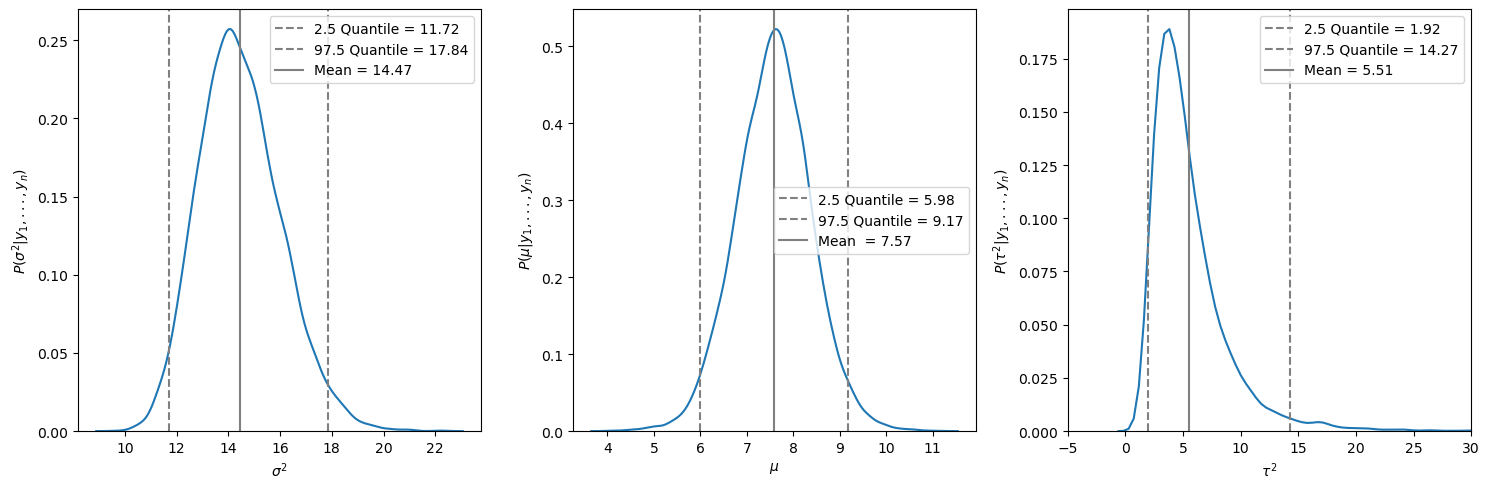

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#sigma^2
lower0 = np.quantile(SMT[:,0],  0.025)
upper0 = np.quantile(SMT[:,0],  0.975)
sns.kdeplot(SMT[:,0],ax=axs[0])
axs[0].axvline(x = lower0, linestyle = '--', color = 'gray', label = f'2.5 Quantile = {round(lower0,2)}')
axs[0].axvline(x = upper0, linestyle = '--', color = 'gray', label = f'97.5 Quantile = {round(upper0,2)}')
axs[0].axvline(x = np.mean(SMT[:,0]), linestyle = '-', color = 'gray', label = f'Mean = {round(np.mean(SMT[:,0]),2)}')
axs[0].set_xlabel('$\\sigma^2$')
axs[0].set_ylabel('$P(\\sigma^2 | y_1,...,y_n)$')

#axs 1

lower1 = np.quantile(SMT[:,1],  0.025)
upper1 = np.quantile(SMT[:,1],  0.975)
sns.kdeplot(SMT[:,1],ax=axs[1])
axs[1].axvline(x = lower1, linestyle = '--', color = 'gray', label = f'2.5 Quantile = {round(lower1,2)}')
axs[1].axvline(x = upper1, linestyle = '--', color = 'gray', label = f'97.5 Quantile = {round(upper1,2)}')
axs[1].axvline(x = np.mean(SMT[:,1]), linestyle = '-', color = 'gray', label = f'Mean  = {round(np.mean(SMT[:,1]),2)}')
axs[1].set_xlabel('$\\mu$')
axs[1].set_ylabel('$P(\\mu | y_1,...,y_n)$')

#axs 2

lower2 = np.quantile(SMT[:,2],  0.025)
upper2 = np.quantile(SMT[:,2],  0.975)
sns.kdeplot(SMT[:,2],ax=axs[2])
axs[2].axvline(x = lower2, linestyle = '--', color = 'gray', label = f'2.5 Quantile = {round(lower2,2)}')
axs[2].axvline(x = upper2, linestyle = '--', color = 'gray', label = f'97.5 Quantile = {round(upper2,2)}')
axs[2].axvline(x = np.mean(SMT[:,2]), linestyle = '-', color = 'gray', label = f'Mean = {round(np.mean(SMT[:,2]),2)}')
axs[2].set_xlabel('$\\tau^2$')
axs[2].set_ylabel('$P(\\tau^2 | y_1,...,y_n)$')
axs[2].set_xlim([-5,30])
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.tight_layout()
plt.show()



and compare prior and posterior distribution:

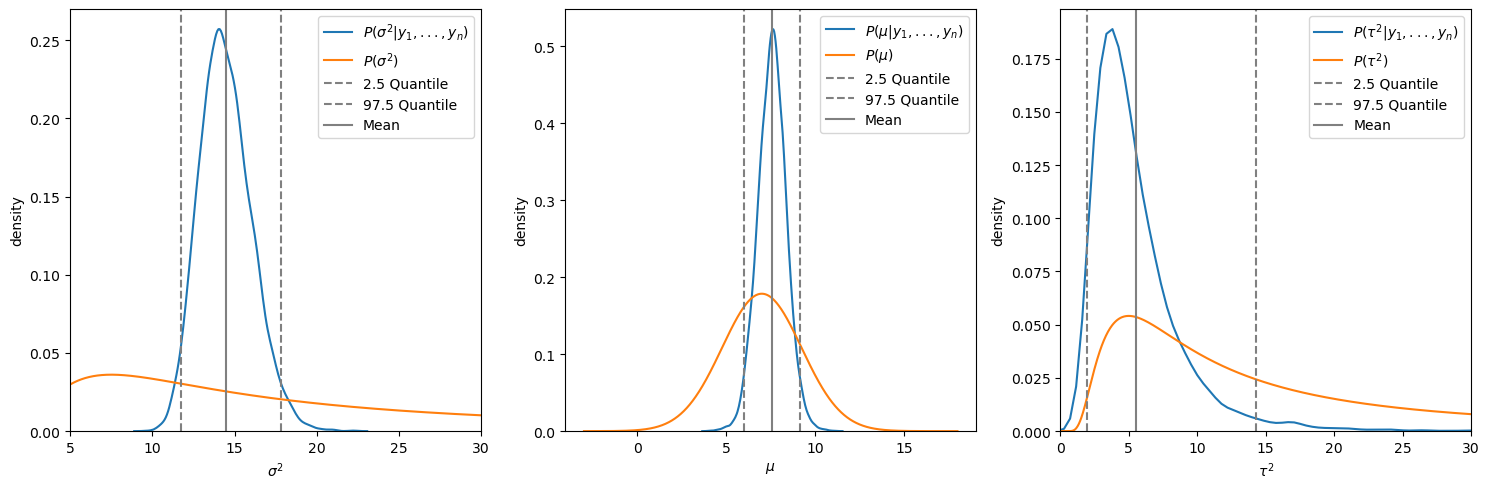

In [68]:
# Prior parameters
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#sigma^2
lower0 = np.quantile(SMT[:,0],  0.025)
upper0 = np.quantile(SMT[:,0],  0.975)
sns.kdeplot(SMT[:,0],ax=axs[0], label = '$P(\\sigma^2 | y_1, ..., y_n)$')

valori = np.linspace(5,30,1000)
s20_prior = invgamma.pdf(valori, a=nu0 / 2, scale=(nu0 * s20)/2)
axs[0].plot(valori,s20_prior, label = '$P(\\sigma^2)$')
axs[0].axvline(x = lower0, linestyle = '--', color = 'gray', label = '2.5 Quantile')
axs[0].axvline(x = upper0, linestyle = '--', color = 'gray', label = '97.5 Quantile')
axs[0].axvline(x = np.mean(SMT[:,0]), linestyle = '-', color = 'gray', label = 'Mean')
axs[0].set_xlabel('$\\sigma^2$')
axs[0].set_ylabel('density')
axs[0].set_xlim([5,30])


#axs 1

lower1 = np.quantile(SMT[:,1],  0.025)
upper1 = np.quantile(SMT[:,1],  0.975)
valori = np.linspace(-3,18,1000)
sns.kdeplot(SMT[:,1],ax=axs[1], label = '$P(\\mu | y_1,...,y_n)$')
axs[1].plot(valori,norm.pdf(valori,loc = mu0, scale = g20**(1/2)), label = '$P(\\mu)$')
axs[1].axvline(x = lower1, linestyle = '--', color = 'gray', label = '2.5 Quantile')
axs[1].axvline(x = upper1, linestyle = '--', color = 'gray', label = '97.5 Quantile')
axs[1].axvline(x = np.mean(SMT[:,1]), linestyle = '-', color = 'gray', label = 'Mean')
axs[1].set_xlabel('$\\mu$')
axs[1].set_ylabel('density')

#axs 2

lower2 = np.quantile(SMT[:,2],  0.025)
upper2 = np.quantile(SMT[:,2],  0.975)
sns.kdeplot(SMT[:,2],ax=axs[2],label = '$P(\\tau^2 | y_1, ... , y_n)$')
valori = np.linspace(0,30,1000)
t20_prior = invgamma.pdf(valori, a=eta0 / 2, scale=(eta0 * t20)/2)
axs[2].plot(valori,t20_prior,label = '$P(\\tau^2)$')
axs[2].axvline(x = lower2, linestyle = '--', color = 'gray', label = '2.5 Quantile')
axs[2].axvline(x = upper2, linestyle = '--', color = 'gray', label = '97.5 Quantile')
axs[2].axvline(x = np.mean(SMT[:,2]), linestyle = '-', color = 'gray', label = 'Mean')
axs[2].set_xlabel('$\\tau^2$')
axs[2].set_ylabel('density')
axs[2].set_xlim([-0,30])

axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.tight_layout()
plt.show()



From the plots above, we can see that we learnt the following from the data:


*   Before observing the data, our prior about the within-school variance ($\sigma^2$) was very weak. After observing the data, we can see that now we expect a value for $\sigma^2$ which is almost 15. Moreover, the variability around this value is low.
*    $\mu$ is around 7.6, which is higher than the prior mean 7.0, and the variance is smaller.

* $\tau^2$  is around 5.



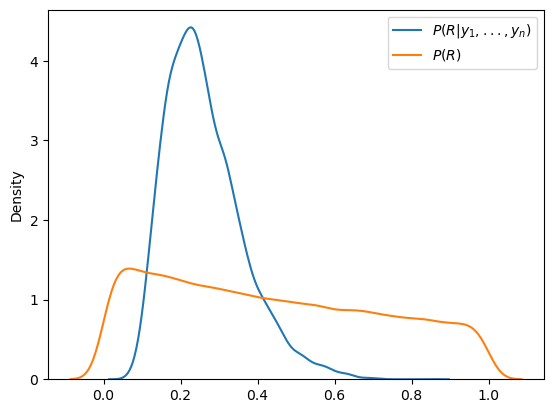

In [69]:
#sigma is within school variance
#tao is between school variance

R = SMT[:,2] / (SMT[:,0] + SMT[:,2])
sns.kdeplot (R, label = "$P(R | y_1, ... ,y_n)$")

# R prior
t20_prior = 1 / gamma.rvs(size=int(1e5), a=eta0 / 2, scale=2/(eta0 * t20))
s20_prior = 1 / gamma.rvs(size=int(1e5), a=nu0 / 2, scale=2/(nu0 * s20))
Rpr = t20_prior/(t20_prior + s20_prior)
sns.kdeplot (Rpr, label = "$P(R)$")
plt.legend()
plt.show()

The plot above shows that about 25% of the variance is due to between-school variation, and the rest is due to within-school variation. Finally, we learn this from the data since the prior is almost flat. So now we are more confident about the between-school variation than before.

Obtain the posterior probability that $\theta_7$ is smaller than $\theta_6$, as well as the posterior probability that $\theta_7$ is the smallest of all the $\theta$'s:


In [70]:
theta7 = THETA[:,6]
theta6 = THETA[:,5]
Ptheta7 = np.array([theta7 < theta6]).astype(int)
print(f'The posterior probability that $\\theta_7 < \\theta_6$ is {np.mean(Ptheta7)}')


# now compute the probability that theta 7 is the smallest one
min_index_per_row = np.argmin(THETA, axis=1)

counts  = np.array([min_index_per_row == 6]).astype(int)

print(f'The posterior probability that $\\theta_7 is the minimum is {np.mean(counts)}')

The posterior probability that $\theta_7 < \theta_6$ is 0.526
The posterior probability that $\theta_7 is the minimum is 0.3218888888888889


Text(0, 0.5, '$\\hat{\\theta}$')

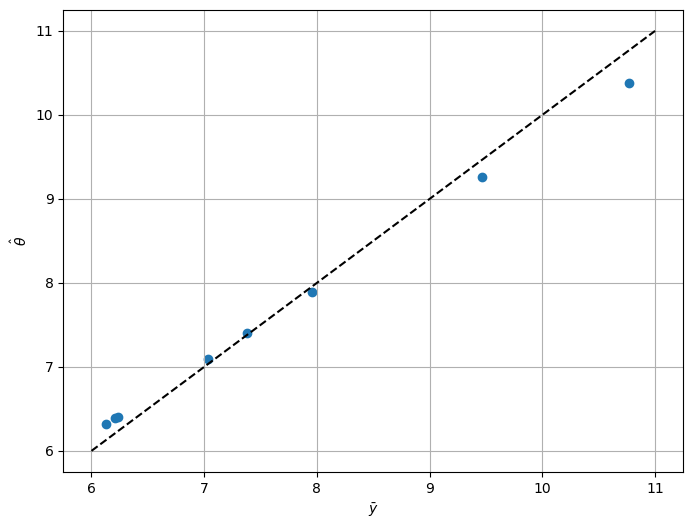

In [71]:
# Create scatter plot with text annotations
theta_exp = []
for j in range(8):
  theta_exp.append(np.mean(THETA[:,j]))


# compute y global mean
gm = np.mean(Y[:,1])
posterior_m = np.mean(SMT[:,1])
plt.figure(figsize=(8, 6))
plt.scatter(ybar, theta_exp, label='school')


# Add abline with slope=1, intercept=0
plt.plot([6, 11], [6, 11], linestyle='--', color='black')
plt.grid()
plt.xlabel('$\\bar{y}$')
plt.ylabel('$\\hat{\\theta}$')



For the schools with large sample averages, the posterior expectations tend to be smaller than the sample averages. For the schools with small sample averages, the posterior expectations tend to be larger than the sample averages. This is a representation of the shrinkage effect.
